# HR Analytics Project- Understanding the Attrition in HR

## Importing Libraries

In [1085]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [1086]:
pd. get_option("display.max_columns",None) #to display maximum columns
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'

In [1087]:
#checking the dimensions of dataset
df.shape

(1470, 35)

In our dataset we have 1470 rows and 35 columns including the target variable "Attrition".

In [1088]:
#checking all the columns
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [1089]:
#getting some dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Our dataset comprises integer and string values.

In [1090]:
#check the unique value counts for all the columns
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [1091]:
#checking count for Attrition column categories
df["Attrition"].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

The count of the Non-Attrited employees is more than Attrited ones. However, for model building we need to balance the data.

([<matplotlib.patches.Wedge at 0x1b782d56910>,
 [Text(-1.136781068348268, 0.6306574368426737, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')])

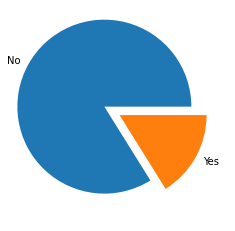

In [1092]:
#plotting pie for the Attrition column
plt.pie(df["Attrition"].value_counts(),explode=(0.2,0),labels=["No","Yes"])

In [1093]:
#checking BusinessTravel category counts
df["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

Count of Rarely Travelling employees is highest.

In [1094]:
#checking Department category counts.
df["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

Maximum employees belongs to Research & Development.

In [1095]:
#checking DistanceFromHome value counts
df["DistanceFromHome"].value_counts()

2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
29     27
23     27
18     26
15     26
20     25
25     25
26     25
28     23
19     22
14     21
12     20
17     20
13     19
22     19
21     18
27     12
Name: DistanceFromHome, dtype: int64

In [1096]:
#checking the unique value counts for Education column
df["Education"].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [1097]:
#checking the count of EducationField categories
df["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Maximum number of employees belongs to Life Sciences field.

In [1098]:
df["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

We have only "1" as the value for EmployeeCount. We can drop this column as it will not have any impact on Target variable.

In [1099]:
#checking the count for EnvironmentSatisfaction levels
df["EnvironmentSatisfaction"].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

Maximum employees has rated 3 for Environment Satisfaction.

In [1100]:
#checking the count of Male and Female employees
df["Gender"].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

We have more number of Male employees.

In [1101]:
df["JobInvolvement"].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [1102]:
#checking the unique value counts of Job Level
df["JobLevel"].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

Maximum employees are at Level 1

In [1103]:
#checking value counts for the Job Roles
df["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

Maximum number of employees belongs to Sales Executive and Research Scientist.

In [1104]:
#checking value counts for Job Satisfaction category
df["JobSatisfaction"].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [1105]:
#checking value count of Marital Status category
df["MaritalStatus"].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

Maximum employees are married.

In [1106]:
#checking value count for Number of Companies worked by employees
df["NumCompaniesWorked"].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

For maximum employees this is there second company.

In [1107]:
df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

All employees are above 18 years.

In [1108]:
df["OverTime"].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [1109]:
#checking value counts for Percentage Hike 
df["PercentSalaryHike"].value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

Maximum employees has received 11% hike in Salary.

In [1110]:
#checking Performance Rating count
df["PerformanceRating"].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

Maximum employees are rated "3" for their performance.

In [1111]:
df["RelationshipSatisfaction"].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [1112]:
df["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [1113]:
df["StockOptionLevel"].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [1114]:
#checking unique value counts for TrainingTimes
df["TrainingTimesLastYear"].value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

Maximum people received 2 times training from last year.

In [1115]:
#checking unique value counts for WorkLifeBalance
df["WorkLifeBalance"].value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

WorkLifeBalance is rated from 1 to 4 and maximum number of people have rated 3.

In [1116]:
#checking missing values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values in our dataset.

<AxesSubplot:>

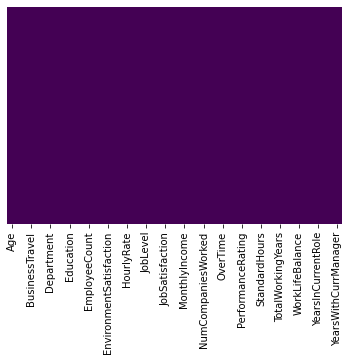

In [1117]:
#Plotting heatmap to show the null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

As we see there are no missing values in our dataset.

In [1118]:
#Dropping "EmployeeCount" and "EmployeeNumber"(its just an ID)
df.drop(["EmployeeCount","EmployeeNumber"],axis=1,inplace=True)

In [1119]:
#statistical information
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As we have total 31 columns with us and here we are seeing the data of only 23 columns. Due to too many columns we cannot see the  statistics for remaining data. Hence we will check the outliers and distribution by plotting graphs. We cannot get complete information here.

## Exploratory Data Analysis

### A] Univariate Analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

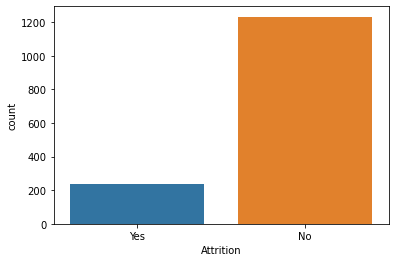

In [1120]:
#Attrition
sns.countplot(df["Attrition"])

From this countplot we can say that our target variable "Attrition" has data imbalance. We have more number of records for the employees who were not attrited.

<AxesSubplot:xlabel='Age', ylabel='Density'>

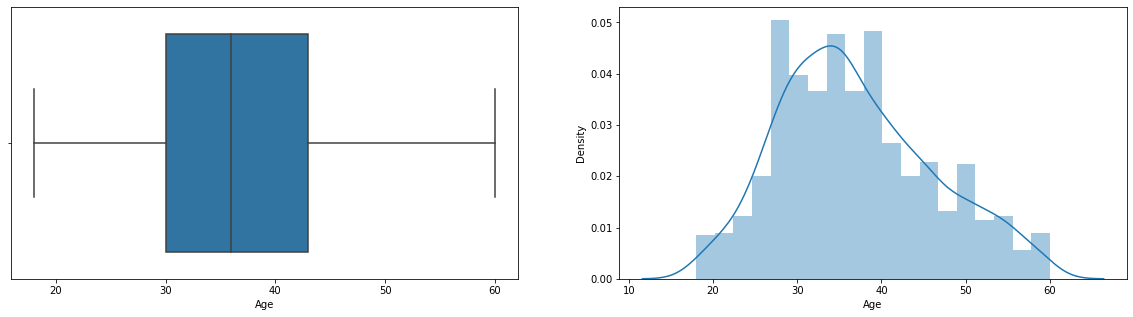

In [1121]:
#Age
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["Age"])
plt.subplot(1,2,2)
sns.distplot(df["Age"])

From above plot, 
- Min age is 18 and max age is 60. There are no outliers in Age column.
- Age is distributed quite normally.

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

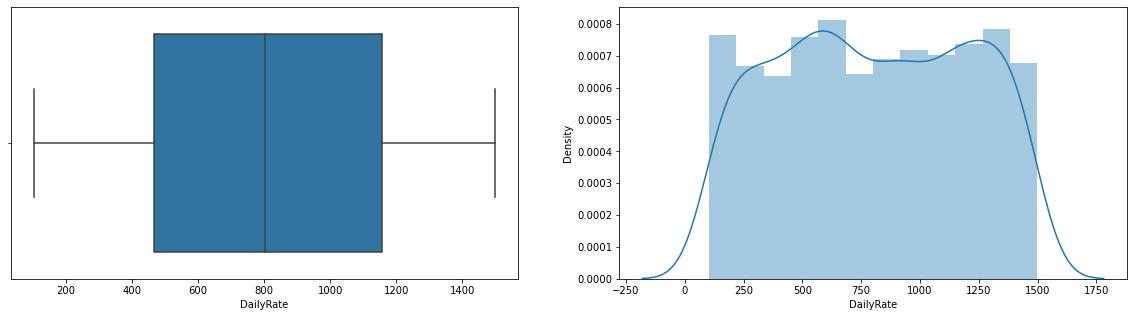

In [1122]:
#DailyRate
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["DailyRate"])
plt.subplot(1,2,2)
sns.distplot(df["DailyRate"])

From above plot,
- There are no outliers for DailyRate feature.
- Distribution is also normal.

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

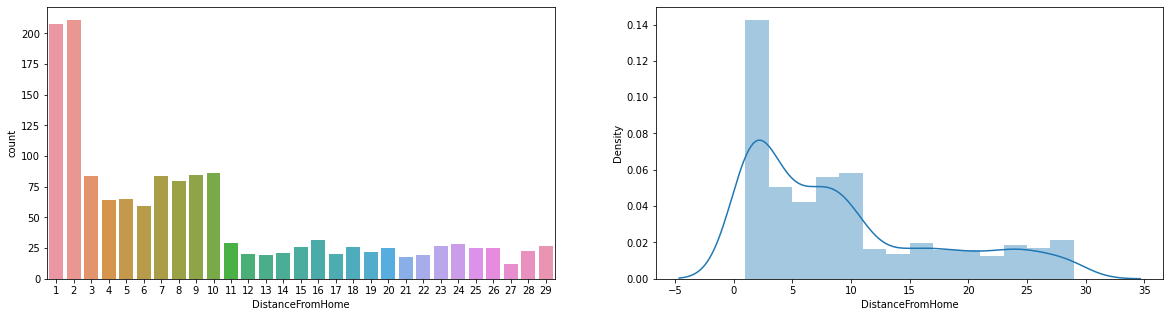

In [1123]:
#DistanceFromHome
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["DistanceFromHome"])
plt.subplot(1,2,2)
sns.distplot(df["DistanceFromHome"])

From above graph,
- Only 400 employees out of 1470 are staying nearby and rest 1000 employees stays far away. It could be one of the reasons for attrition.
- The distribution is right skewed.

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='count'>

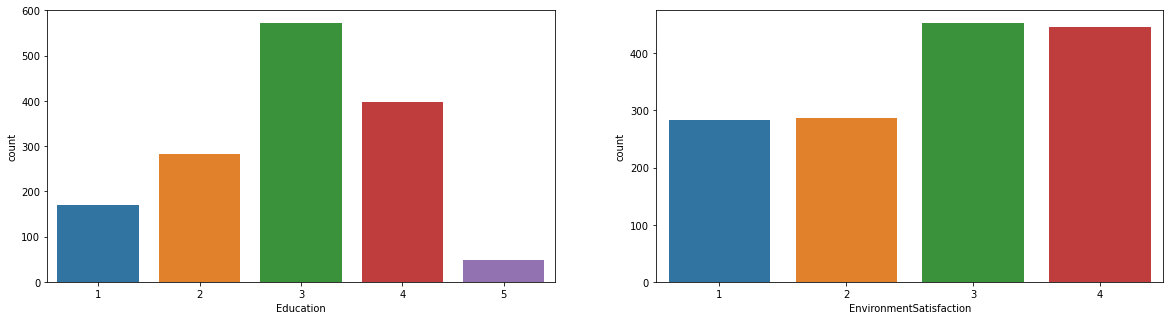

In [1124]:
plt.figure(figsize=(20,5))

#Education
plt.subplot(1,2,1)
sns.countplot(df["Education"])
#EnvironamentSatisfaction
plt.subplot(1,2,2)
sns.countplot(df["EnvironmentSatisfaction"])

From above plots,
- Maximum employees have Bachelor's and Master's Degree.
- Maximum employees have rated Environment Satisfaction as 3 & 4 that means they are highly satisfied.

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

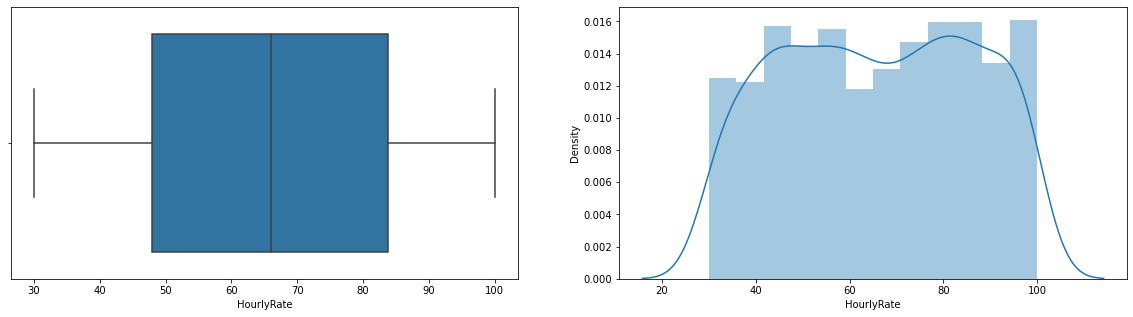

In [1125]:
#HourlyRate
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["HourlyRate"])
plt.subplot(1,2,2)
sns.distplot(df["HourlyRate"])

There are no outliers present and also the distribution is normal.

<AxesSubplot:xlabel='HourlyRate', ylabel='count'>

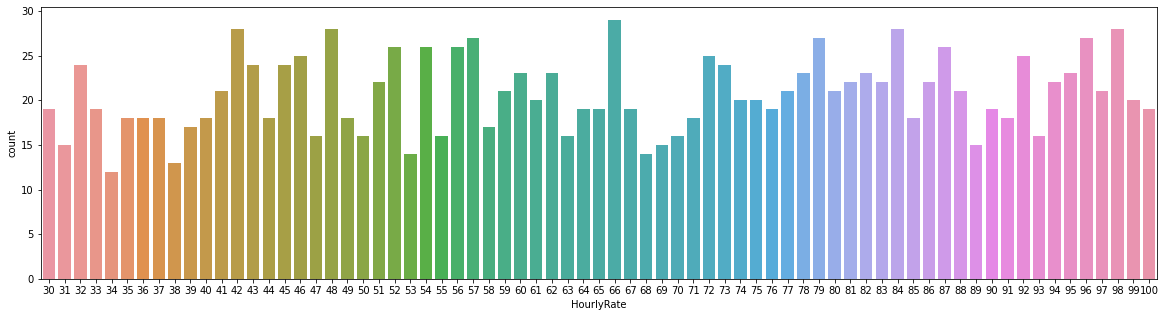

In [1126]:
#HourlyRate
plt.figure(figsize=(20,5))
sns.countplot(df["HourlyRate"])

Hourly Rate is varying from 30 to 100.

<AxesSubplot:xlabel='JobLevel', ylabel='count'>

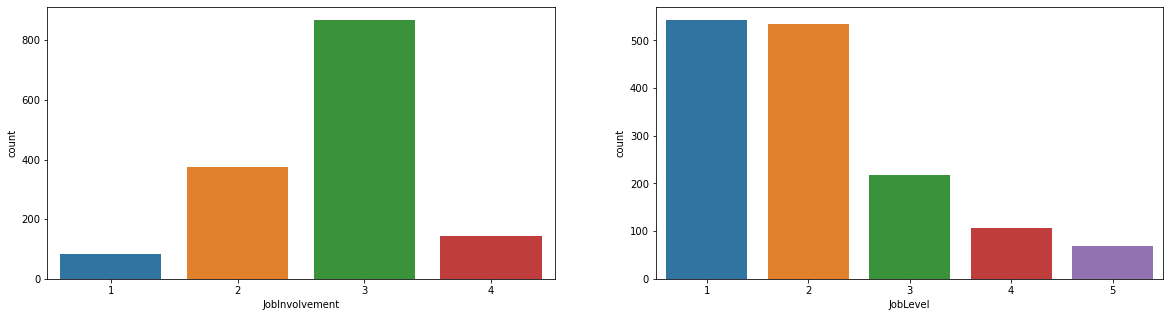

In [1127]:
plt.figure(figsize=(20,5))

#JobInvolvement
plt.subplot(1,2,1)
sns.countplot(df["JobInvolvement"])
#JobLevel
plt.subplot(1,2,2)
sns.countplot(df["JobLevel"])


From above plots,
- Around 850 employees are Highly involved in the Job. 
- Around 1100 employees are at Job Levels 1 and 2.

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

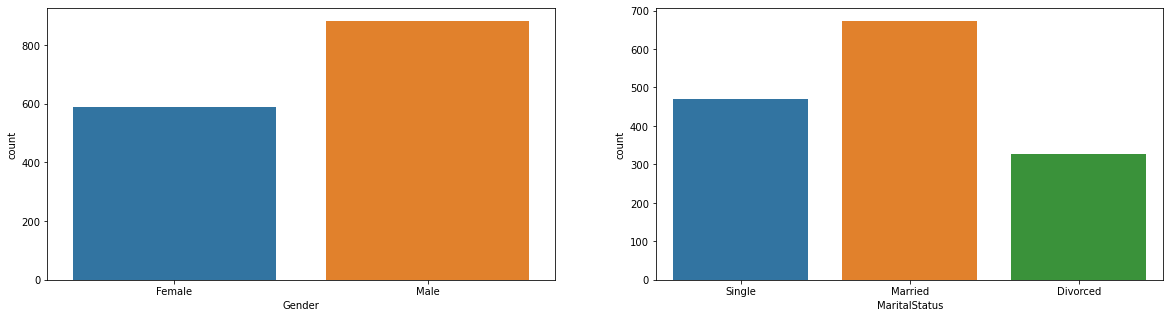

In [1128]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["Gender"])
plt.subplot(1,2,2)
sns.countplot(df["MaritalStatus"])

From above plots,
- Around 880 employees are Male and rest are Females.
- Around 470 employees are Single and 670 are Married.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manufacturing Director'),
  Text(4, 0, 'Healthcare Representative'),
  Text(5, 0, 'Manager'),
  Text(6, 0, 'Sales Representative'),
  Text(7, 0, 'Research Director'),
  Text(8, 0, 'Human Resources')])

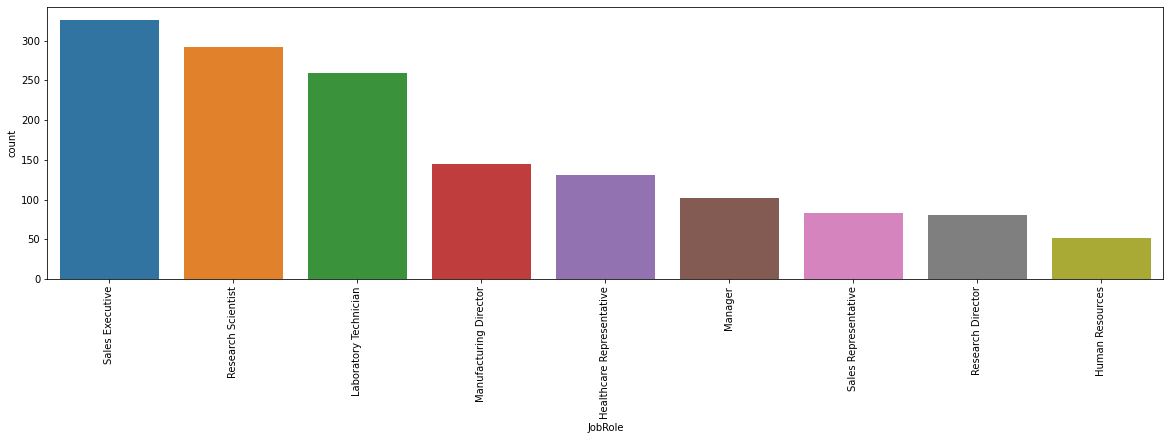

In [1129]:
plt.figure(figsize=(20,5))
sns.countplot(df["JobRole"])
plt.xticks(rotation=90)

Maximum number of employees belongs to Sales Executive, Research Scientist and Laboratoty Technician Job Roles.

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

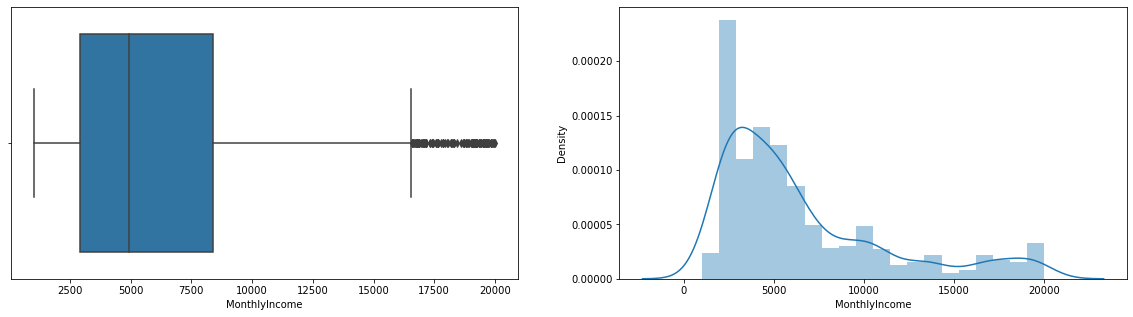

In [1130]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["MonthlyIncome"])
plt.subplot(1,2,2)
sns.distplot(df["MonthlyIncome"])

From above plots,
- The Monthly Income ranges from 1009 to 20000. Here we see few outliers as count of people getting higher Monthly Income is less.
- Due to few outliers present the distribution is slight right skewed.

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

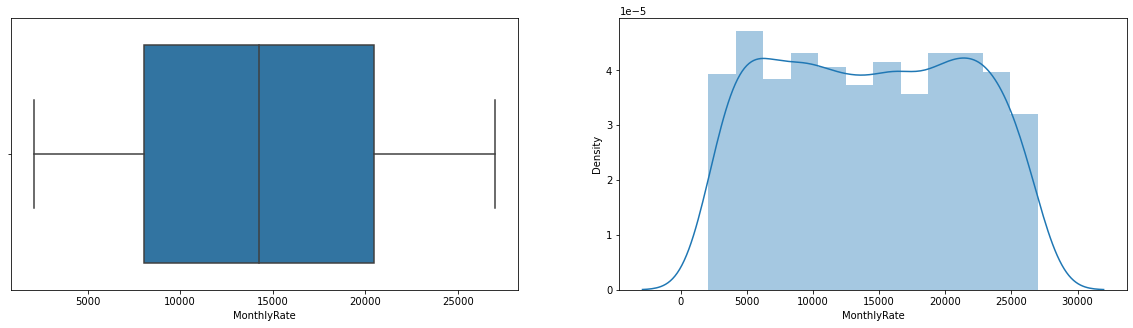

In [1131]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.boxplot(df["MonthlyRate"])
plt.subplot(1,2,2)
sns.distplot(df["MonthlyRate"])

From above plots,
- Monthly Rate ranges from 2100 to 27000. There are no outliers present. 

<AxesSubplot:xlabel='OverTime', ylabel='count'>

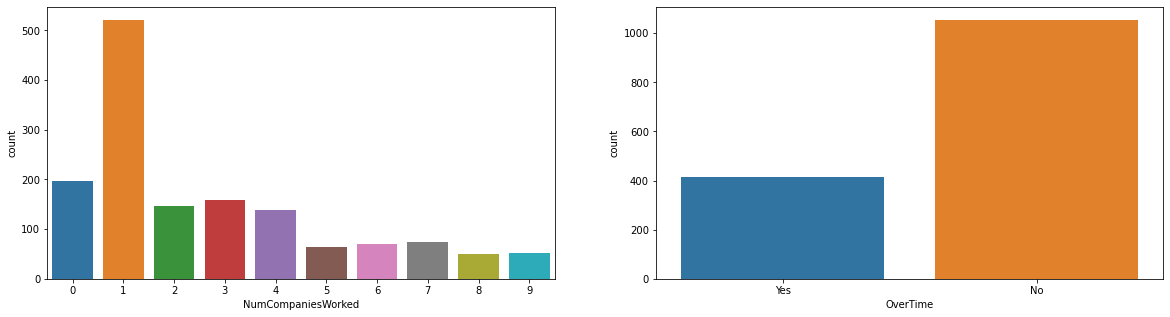

In [1132]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["NumCompaniesWorked"])
plt.subplot(1,2,2)
sns.countplot(df["OverTime"])

From above plots,
- For around 530 employees this is there second company.
- Around 1000 employees are not doing Over time.

<AxesSubplot:xlabel='PerformanceRating', ylabel='count'>

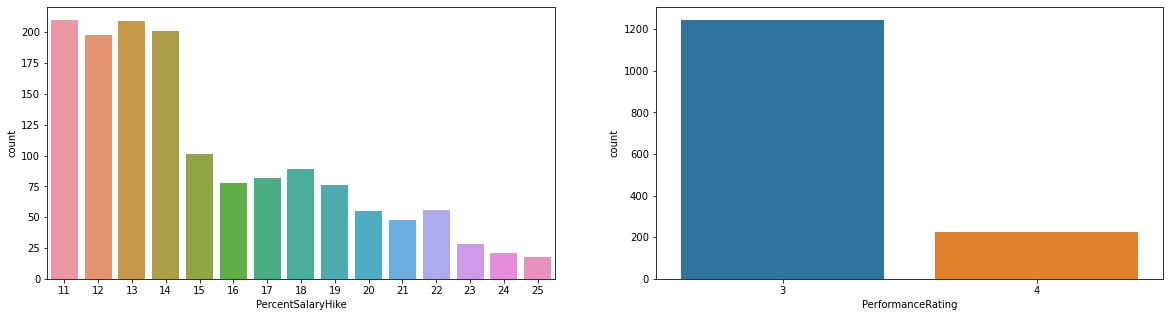

In [1133]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["PercentSalaryHike"])
plt.subplot(1,2,2)
sns.countplot(df["PerformanceRating"])

From above plots,
- Most of employees are getting Salary Hike from 11 to 15%.
- Around 1200 employees are having Performance Rating of 3.

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

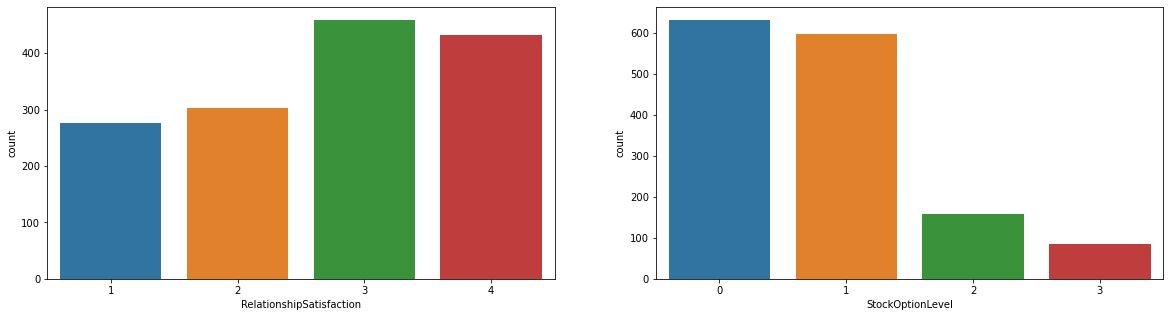

In [1134]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["RelationshipSatisfaction"])
plt.subplot(1,2,2)
sns.countplot(df["StockOptionLevel"])

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='Density'>

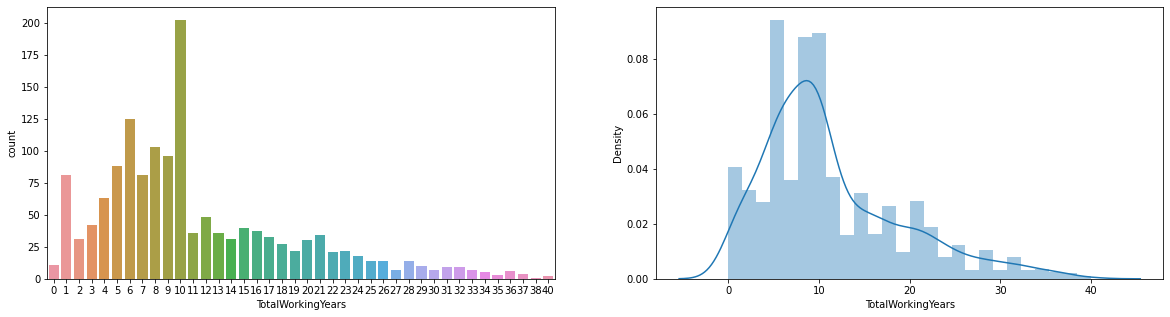

In [1135]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["TotalWorkingYears"])
plt.subplot(1,2,2)
sns.distplot(df["TotalWorkingYears"])

From above plots,
- In the company not many employees has experience of more than 10 years.
- The distribution is right skewed.

<AxesSubplot:xlabel='WorkLifeBalance', ylabel='count'>

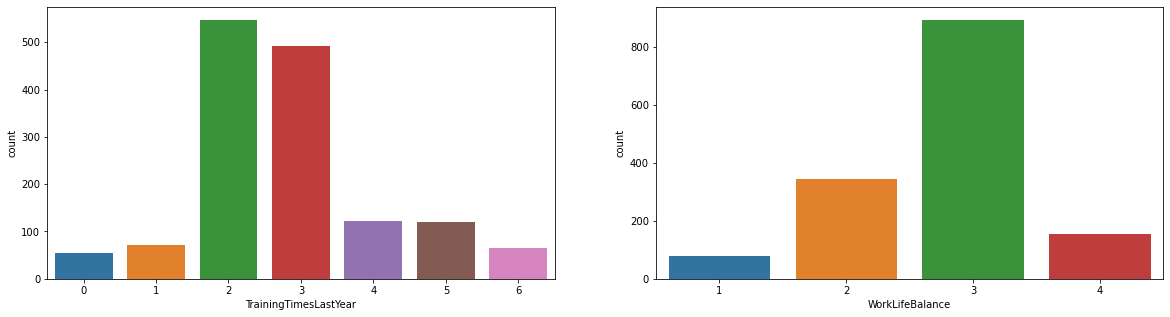

In [1136]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
sns.countplot(df["TrainingTimesLastYear"])
plt.subplot(1,2,2)
sns.countplot(df["WorkLifeBalance"])

<AxesSubplot:xlabel='YearsAtCompany', ylabel='count'>

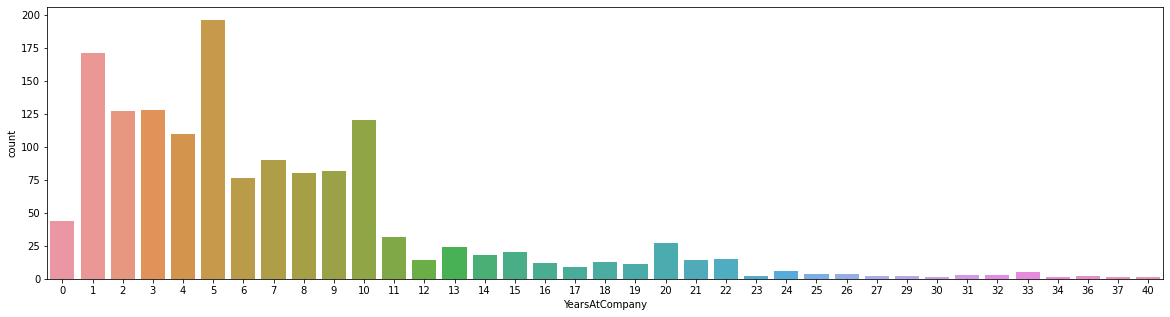

In [1137]:
plt.figure(figsize=(20,5))
sns.countplot(df["YearsAtCompany"])

Most of the employees have completed 1 to 10 years in the company.

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

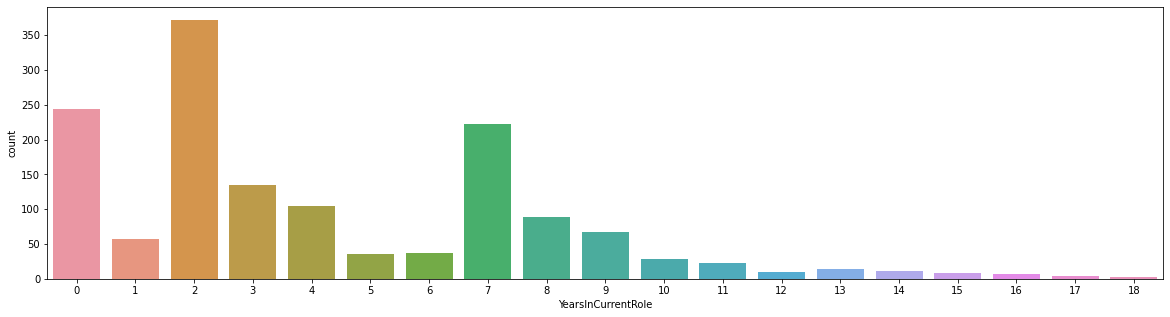

In [1138]:
plt.figure(figsize=(20,5))
sns.countplot(df["YearsInCurrentRole"])

There are employees who are working in their current role from last 10 to 18 years.

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

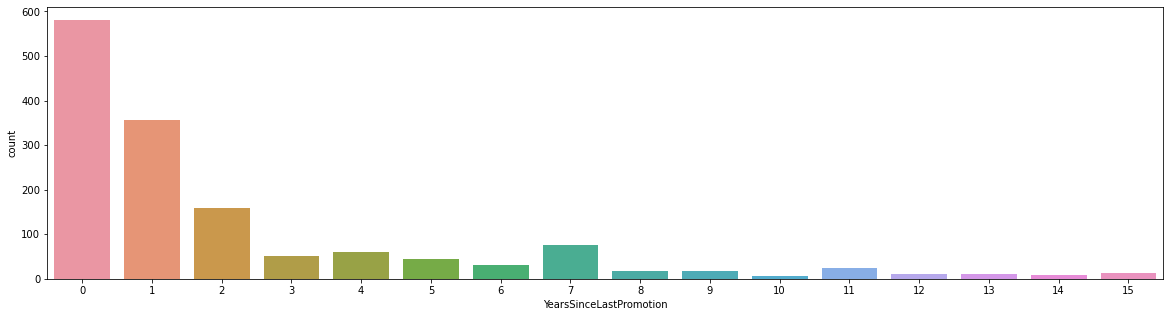

In [1139]:
plt.figure(figsize=(20,5))
sns.countplot(df["YearsSinceLastPromotion"])

Around 580 employees are recently promoted. There are few employees who are promoted since last 10 to 15 years. 

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

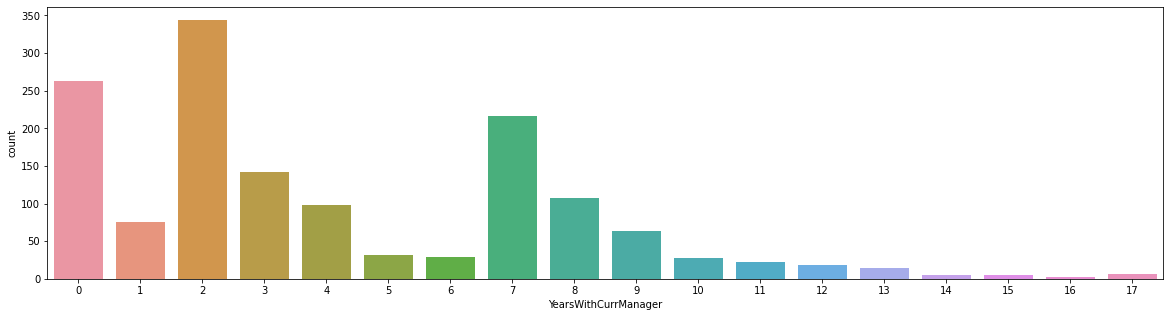

In [1140]:
plt.figure(figsize=(20,5))
sns.countplot(df["YearsWithCurrManager"])

Many of the employees are comfortable with their Current Manager as they are work for long years.

In [1141]:
#Encoding Attrition, Gender and OverTime columns
df.Attrition.replace(['Yes','No'],[1,0],inplace=True)
df.Gender.replace(['Male','Female'],[1,0],inplace=True)
df.OverTime.replace(['Yes','No'],[1,0],inplace=True)

In [1142]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


### B] Bivariate Analysis

In [1143]:
#Object Datatypes
obj_feature=df.select_dtypes(include=['object'])
#Numerical Datatypes
obj_numeric=df.select_dtypes(exclude=['object'])

#### Relation of Target Variable with Categorical Features

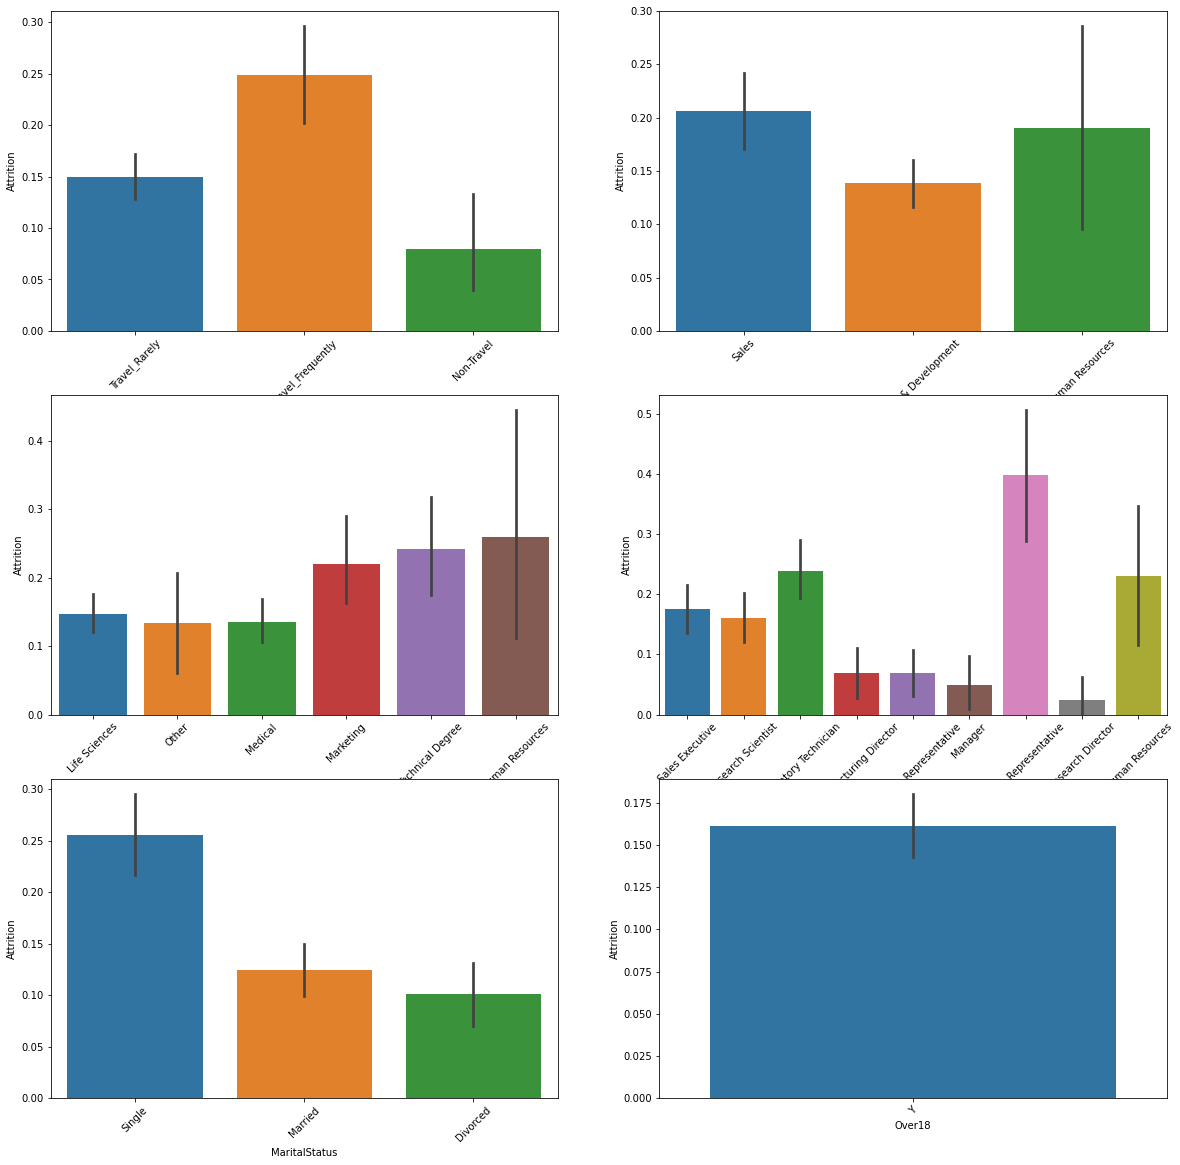

In [1144]:
plt.figure(figsize=(20,20))
for i,feat in enumerate(obj_feature.columns):
    plt.subplot(3,2,i+1)
    sns.barplot(x=df[feat],y=df['Attrition'])
    plt.xticks(rotation=45)
plt.show()

Observations :-
- Employees who travel frequently for business purpose tends to leave company early than who travel rarely and those who don't need to travel will stay in company.
- Research and Development team employees will stay longer in company than other departments.
- Employees whose education background is from Human Resources, Technical Degree, Marketing tends to leave company than other ones from other Educational backgground.
- Sales representatives will leave company much earlier than others, Research Directors rarely leaves the company.
- Singles tends to leave company than Married and Divorced ones.

#### Relation of Target Variable with Numerical Features

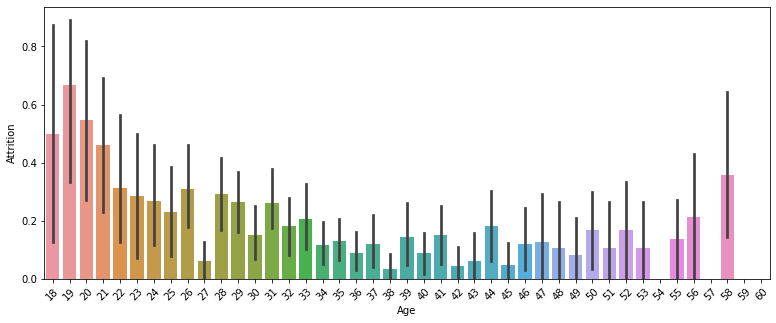

In [1145]:
# Age
plt.figure(figsize=(13,5))
sns.barplot(x=df['Age'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observations :-
- Younger employees highly tends to leave company than Mid-aged employees.
- Employees whose age is more than 55 tends to leave company than Mid-aged.

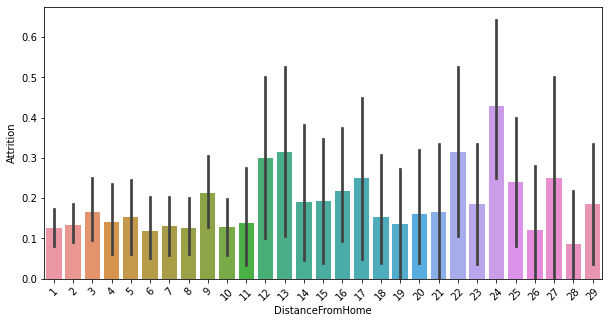

In [1146]:
# DistanceFromHome
plt.figure(figsize=(10,5))
sns.barplot(x=df['DistanceFromHome'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation :-
- Employees who travels from long distance to workplace tends to leave the company than others.

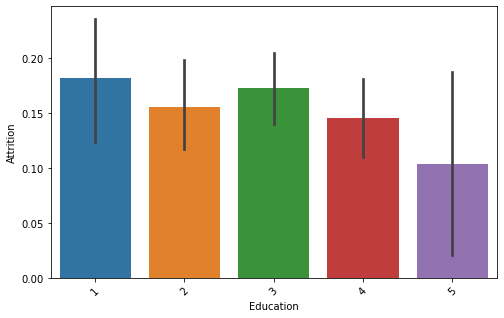

In [1147]:
# Education
plt.figure(figsize=(8,5))
sns.barplot(x=df['Education'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation :-
- Employees who are less educated tends to leave company sooner than others. 

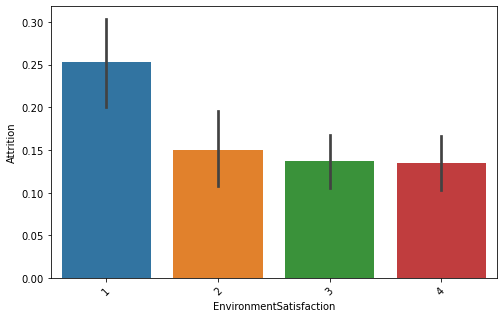

In [1148]:
# EnvironmentSatisfaction
plt.figure(figsize=(8,5))
sns.barplot(x=df['EnvironmentSatisfaction'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation :-
- Employees who leastly likes the environment in company tends to leave company sooner than others.

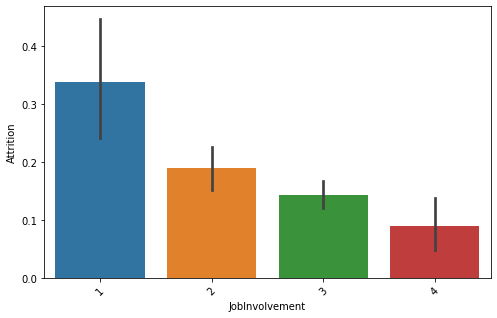

In [1149]:
# JobInvolvement
plt.figure(figsize=(8,5))
sns.barplot(x=df['JobInvolvement'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation :-
-  Employees who leastly involves in Job in company tends to leave company sooner than others.

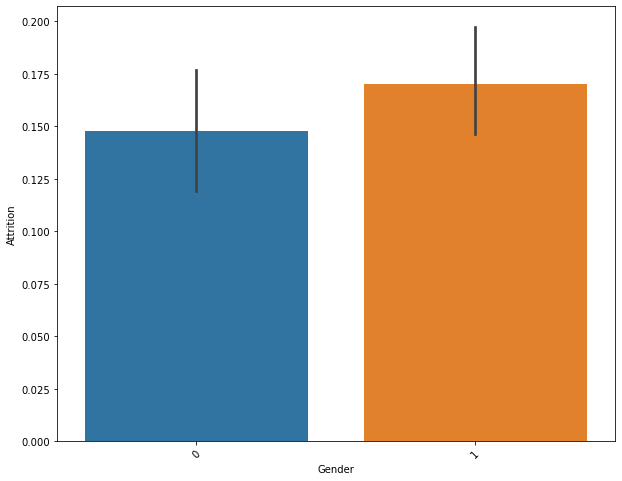

In [1150]:
# Gender
plt.figure(figsize=(10,8))
sns.barplot(x=df['Gender'],y=df['Attrition'])
plt.xticks(rotation=45)
plt.show()

Observation :-
- Men tends to leave company sooner than women.

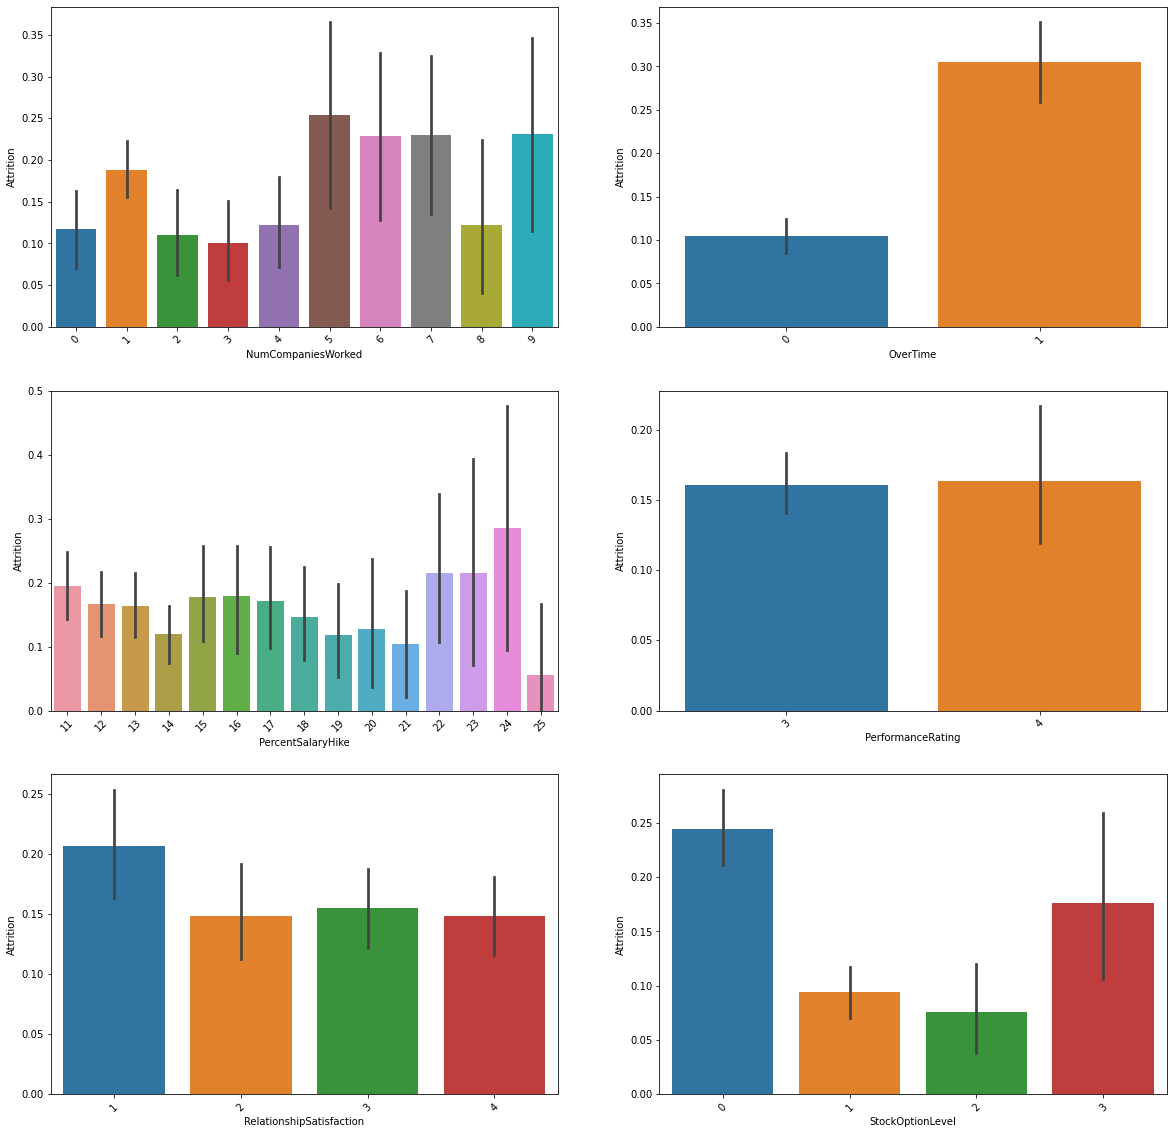

In [1151]:
other_fea = ['NumCompaniesWorked','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel']
plt.figure(figsize=(20,20))
for i,feat in enumerate(other_fea):
    plt.subplot(3,2,i+1)
    sns.barplot(x=df[feat],y=df['Attrition'])
    plt.xticks(rotation=45)
plt.show()

Observations :-
- Employees who worked for more number of companies tends to switch again.
- Employees who got more percentage of hike tending to leave company probably to get more hike in new company.
- Performance Rating 3 & 4 has almost equal probability to leave or stay in company. 
- Employees who have less Relationship Satisfaction tends to leave earlier than others.
- Employees who have no stocks tends to leave than who have more options. Employees who have more options tends to leave than who have comparitively less options.

#### Relation of Target Variable with Tenurity features

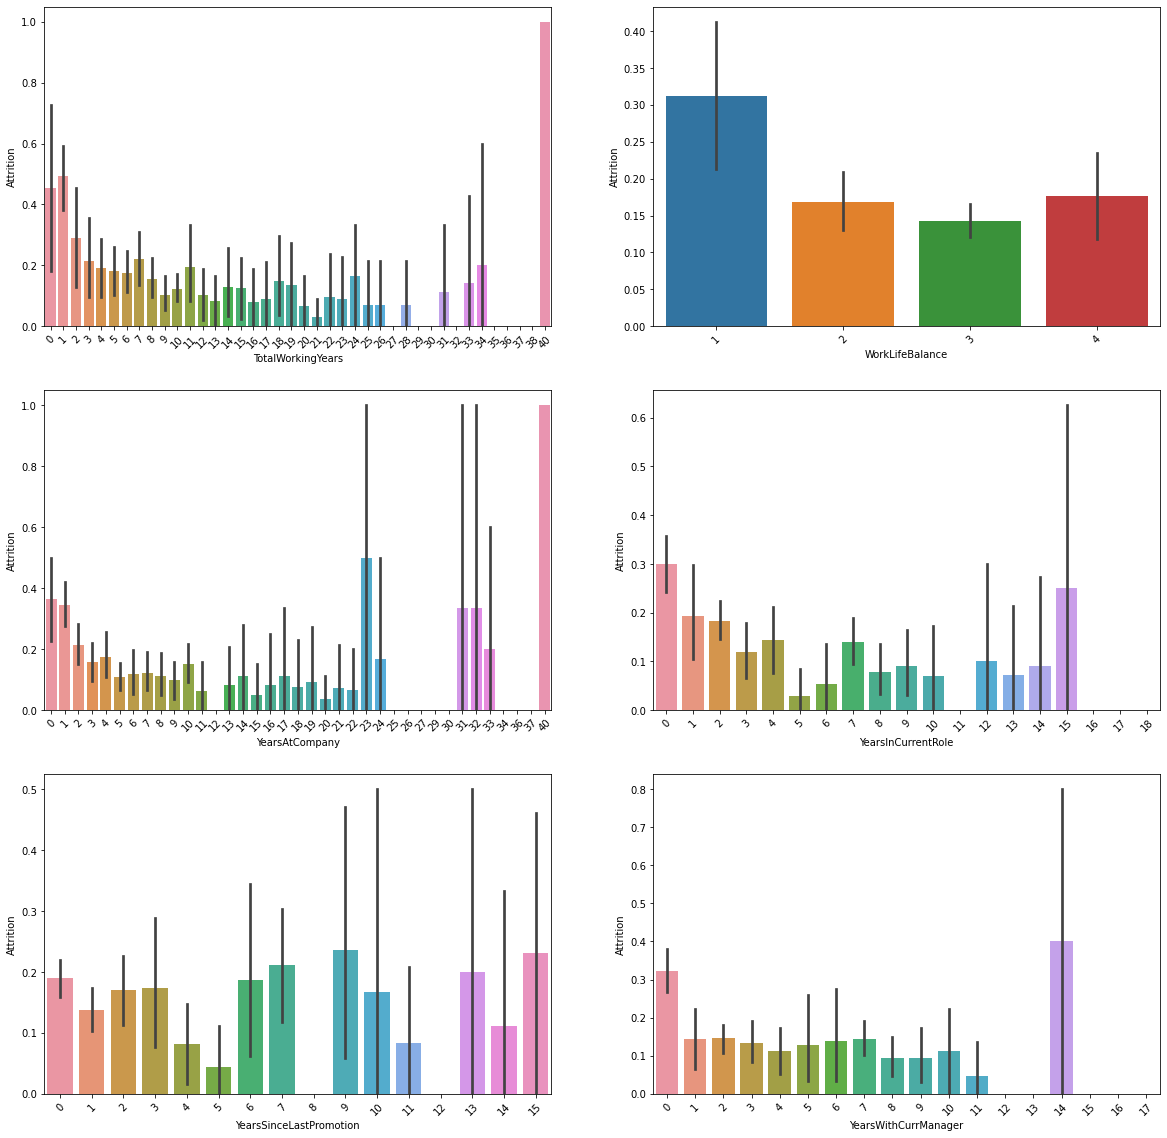

In [1152]:
year_features=['TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
plt.figure(figsize=(20,20))
for i,feat in enumerate(year_features):
    plt.subplot(3,2,i+1)
    sns.barplot(x=df[feat],y=df['Attrition'])
    plt.xticks(rotation=45)
plt.show()

Observations :-
- Employees having 40 years experience tend to leave company. Also those who joined recently(whose experience is less than 2 years) tends to leave.
- Employees who have least Work Life Balance tends to resign earlier than others.
- Senior Employees in the company tends to leave sooner than others.
- Employees who stays in current role for longer time and who just got new role tends to leave company sooner than others.
- Employees who don't get promotion for long time tends to leave company.
- Employees who stays with same Manager for longer time and shorter time tends to leave comoany than others.

### C] Multivariate Analysis

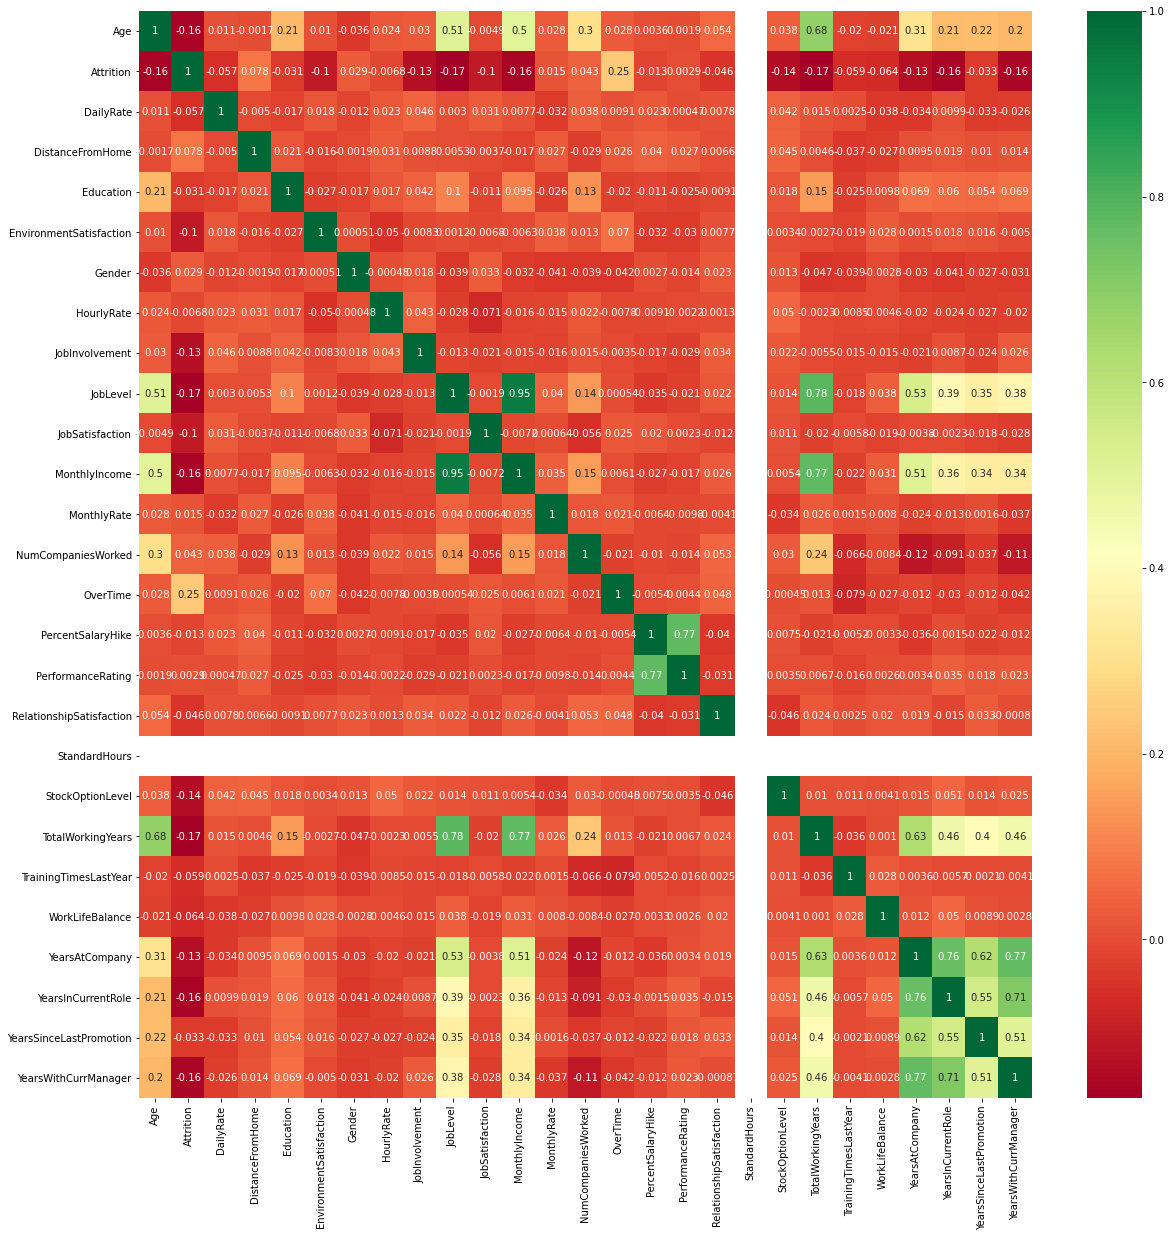

In [1153]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

Observations :-
- JobLevel is highly correlated with MonthlyIncome(95%).
- JobLevel is correlated with TotalExperience(78%).
- Percentage of SalaryHike is related to PerformanceRating(77%).
- MonthlyIncome is correlated with TotalExperience(77%).
- YearsAtCompany is correlated with YearsWithCurrManager(77%).
- YearsAtCompany is correlated with YearsinCurrentRole(76%).
- Attrition rate is comparatively highly correlated with OverTime(25%).
- Attrition rate is least correlated with Percentage of SalaryHike(0.013%) and MonthlyRate(0.0015%)

### Feature Engineering - One Hot Encoding

In [1154]:
#Categorical Variable conversion for remaining columns
df = pd.get_dummies(df,drop_first=True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


With this all the categorical columns for training dataset are converted to numerical.

### Outliers

We have checked with the boxplots we don't have any extreme outliers in our dataset.

### Creating X an Y Split

In [1155]:
x=df.drop(["Attrition","PercentSalaryHike","MonthlyRate"],axis=1)
y=df["Attrition"]

### Treating Imbalanced Data

In [1156]:
from imblearn.over_sampling import SMOTE

In [1157]:
SM=SMOTE()
x,y=SM.fit_resample(x,y)

In [1158]:
y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

Now, our target variable is balanced.

### Checking and Removing Skewness

In [1159]:
x.skew()

Age                                  0.496605
DailyRate                            0.127531
DistanceFromHome                     0.813986
Education                           -0.157286
EnvironmentSatisfaction             -0.019982
Gender                              -0.125219
HourlyRate                           0.003247
JobInvolvement                      -0.341276
JobLevel                             1.264732
JobSatisfaction                     -0.009100
MonthlyIncome                        1.565233
NumCompaniesWorked                   0.972050
OverTime                             0.898452
PerformanceRating                    2.642974
RelationshipSatisfaction            -0.129081
StandardHours                        0.000000
StockOptionLevel                     1.259014
TotalWorkingYears                    1.285157
TrainingTimesLastYear                0.607595
WorkLifeBalance                     -0.414909
YearsAtCompany                       1.959161
YearsInCurrentRole                

We can ignore the skewness of categorical columns. However, we need to treat the numerical column skewness.

In [1160]:
from sklearn.preprocessing import PowerTransformer

In [1161]:
#Power Transformation to remove skewness
PT=PowerTransformer()
data_PT=PT.fit_transform(x)
x=pd.DataFrame(data_PT,columns=x.columns)

In [1162]:
#skewness after transformation
x.skew()

Age                                 -0.003090
DailyRate                           -0.151299
DistanceFromHome                    -0.048713
Education                           -0.070445
EnvironmentSatisfaction             -0.108737
Gender                              -0.125219
HourlyRate                          -0.083944
JobInvolvement                      -0.065642
JobLevel                             0.247437
JobSatisfaction                     -0.106112
MonthlyIncome                        0.000000
NumCompaniesWorked                   0.005338
OverTime                             0.898452
PerformanceRating                    0.000000
RelationshipSatisfaction            -0.130809
StandardHours                        0.000000
StockOptionLevel                     0.351007
TotalWorkingYears                   -0.016539
TrainingTimesLastYear                0.075907
WorkLifeBalance                     -0.047074
YearsAtCompany                      -0.002899
YearsInCurrentRole                

Now, the all the skew values are between -0.5 to +0.5.

### Scaling

As we have done Power Transformation, there is no need of Scaling as standardize is True for PowerTransformer object. Hence, the model will not be biased.

## Building the Model

In [1163]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import metrics

### Finding Best Random_State

In [1164]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc > maxAcc:
        maxAcc=acc
        maxRS=i
        
print("Best Accuracy is ",maxAcc," on Random State ",maxRS)

Best Accuracy is  0.9324324324324325  on Random State  3


Using the best Random State to create new train_test_split.

In [1165]:
#here we going to split data in traing set and testing
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)

In [1166]:
#Importing the packages to build models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

### 1.LogisticRegression

In [1167]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
pred=LR.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[332  27]
 [ 53 328]] 

Accuracy Score: 89.1891891891892
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       359
           1       0.92      0.86      0.89       381

    accuracy                           0.89       740
   macro avg       0.89      0.89      0.89       740
weighted avg       0.89      0.89      0.89       740



### 2.AdaBoostClassifier

In [1168]:
AD=AdaBoostClassifier()
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[323  36]
 [ 52 329]] 

Accuracy Score: 88.10810810810811
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       359
           1       0.90      0.86      0.88       381

    accuracy                           0.88       740
   macro avg       0.88      0.88      0.88       740
weighted avg       0.88      0.88      0.88       740



### 3.DecisionTreeClassifier

In [1169]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[297  62]
 [ 68 313]] 

Accuracy Score: 82.43243243243244
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       359
           1       0.83      0.82      0.83       381

    accuracy                           0.82       740
   macro avg       0.82      0.82      0.82       740
weighted avg       0.82      0.82      0.82       740



### 4.RandomForestClassifier

In [1170]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[341  18]
 [ 61 320]] 

Accuracy Score: 89.32432432432432
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       359
           1       0.95      0.84      0.89       381

    accuracy                           0.89       740
   macro avg       0.90      0.89      0.89       740
weighted avg       0.90      0.89      0.89       740



### 5.SVC

In [1171]:
SC=SVC()
SC.fit(x_train,y_train)
pred=SC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[348  11]
 [ 65 316]] 

Accuracy Score: 89.72972972972974
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       359
           1       0.97      0.83      0.89       381

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.91      0.90      0.90       740



Here, we observe that LogisticRegression is giving the highest accuracy score. But we all know, it may or may not be due to overfitting, we are not sure about this. So we cannot confirm it as the best model. To be sure about the best model, we will go for the Cross Validation Score.

### Cross Validation Score

In [1172]:
from sklearn.model_selection import cross_val_score

In [1173]:
print(cross_val_score(LR,x,y,cv=5).mean()) #cross validation score for LogisticRegression

0.8780563516765074


In [1174]:
print(cross_val_score(AD,x,y,cv=5).mean()) #cross validation score for AdaBoostClassifier

0.8525075756953626


In [1175]:
print(cross_val_score(DTC,x,y,cv=5).mean()) #cross validation score for DecisionTreeClassifier

0.8163676080511781


In [1176]:
print(cross_val_score(RFC,x,y,cv=5).mean()) #cross validation score for RandomForestClassifier

0.9047917812943969


In [1177]:
print(cross_val_score(SC,x,y,cv=5).mean()) #cross validation score for SVC

0.8971249312233619


From the above cross validation score, we can conclude that SVC is our best model with the least difference.

### Hyper Parameter Tuning

Now, let's apply Hyper Paramter Tuning on the best model to improve the accuracy score.

In [1178]:
from sklearn.model_selection import GridSearchCV

In [1179]:
parameters={'C':[1.0,1.1,1.3,1.4,1.5,2.0,2.4,2.6],
           'kernel':['linear','poly','rbf'],
           'gamma':['scale','auto'],
           'degree':[1,2,3,4]}

In [1180]:
GCVSVC=GridSearchCV(SVC(),parameters,cv=5)
GCVSVC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 1.1, 1.3, 1.4, 1.5, 2.0, 2.4, 2.6],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [1181]:
GCVSVC.best_params_

{'C': 2.4, 'degree': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [1182]:
Final_modSVC=SVC(C=2.4,degree=1,gamma='scale',kernel='rbf')
Final_modSVC.fit(x_train,y_train)
pred=Final_modSVC.predict(x_test)
class_report=classification_report(y_test,pred)
cm=confusion_matrix(y_test,pred)
acc=accuracy_score(y_test,pred)*100
print("Confusion Matrix\n",cm,"\n")
print("Accuracy Score:",acc)
print(class_report)

Confusion Matrix
 [[342  17]
 [ 59 322]] 

Accuracy Score: 89.72972972972974
              precision    recall  f1-score   support

           0       0.85      0.95      0.90       359
           1       0.95      0.85      0.89       381

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740



After Hyper Parameter tuning, the improved score of the best model SVC is 90%

### Plotting AUC_ROC curve

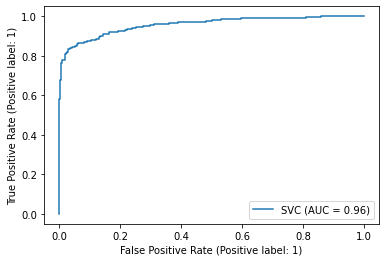

In [1183]:
metrics.plot_roc_curve(Final_modSVC, x_test, y_test)

The AUC score is 0.96

### Saving the Model

In [1184]:
import joblib
joblib.dump(Final_modSVC,"HR_model.pkl")

['HR_model.pkl']